In [1]:
# Import Libraries

# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load Dataset

# Load the dataset
data = pd.read_csv("data_for_predictions.csv")

# View first few rows
data.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [5]:
# Check shape
data.shape

(14606, 64)

In [7]:
# Check missing values
data.isnull().sum()

Unnamed: 0                                    0
id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 64, dtype: int64

In [9]:
# Define Features and Target

# Define target variable
y = data['churn']

# Define feature variables
X = data.drop('churn', axis=1)

In [11]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # Important for churn problems
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (11684, 63)
Testing set size: (2922, 63)


In [15]:
# Check data types
data.dtypes

Unnamed: 0                                      int64
id                                             object
cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
                                               ...   
channel_lmkebamcaaclubfxadlmueccxoimlema        int64
channel_usilxuppasemubllopkaafesmlibmsdf        int64
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws      int64
origin_up_ldkssxwpmemidmecebumciepifcamkci      int64
origin_up_lxidpiddsbxsbosboudacockeimpuepw      int64
Length: 64, dtype: object

In [17]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0', 'id'], axis=1)

# Verify everything is numeric now
data.dtypes

cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
forecast_cons_12m                             float64
forecast_discount_energy                      float64
                                               ...   
channel_lmkebamcaaclubfxadlmueccxoimlema        int64
channel_usilxuppasemubllopkaafesmlibmsdf        int64
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws      int64
origin_up_ldkssxwpmemidmecebumciepifcamkci      int64
origin_up_lxidpiddsbxsbosboudacockeimpuepw      int64
Length: 62, dtype: object

In [19]:
# Define Features and Target

# Define target variable
y = data['churn']

# Define features
X = data.drop('churn', axis=1)

In [21]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (11684, 61)
Test shape: (2922, 61)


In [23]:
# Train Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'   # Important for churn
)

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Make Predictions

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

In [27]:
# Evaluate Model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.91


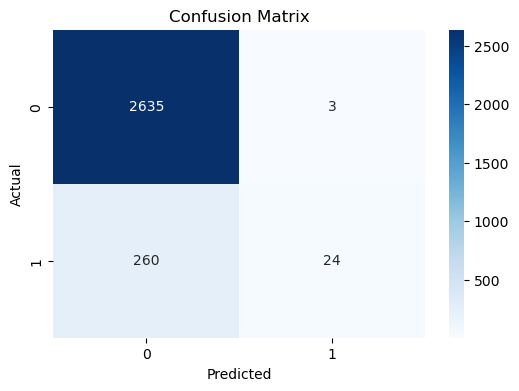

In [29]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.89      0.08      0.15       284

    accuracy                           0.91      2922
   macro avg       0.90      0.54      0.55      2922
weighted avg       0.91      0.91      0.87      2922



In [33]:
# ROC-AUC Score

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", round(roc_auc,4))

ROC-AUC Score: 0.7012
